In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# tryig to set the target variable as the fatal or non fatal accindents in France metropolitan area
#Step 2/ Pre-processing and feature engineering : Deadline Friday, 14th of July
#Following the observations made in the previous step, you will have to clean your dataset and perform the pre-processing steps.
#If necessary, you will have to transform and/or add features and enrich your dataset.
#The objective at the end of this step is to have a dataset ready to perform in-depth analysis and/or modeling using Machine (and Deep) Learning.

In [21]:
df = pd.read_csv("./data/merged_tables.csv", index_col=0)

df.info()


C:\Users\tiago\AppData\Local\Temp\ipykernel_7712\3491915842.py:1: DtypeWarning: Columns (13,19,25,27,30,32,39,40,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./data/merged_tables.csv", index_col=0)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2509598 entries, 201900000001 to 201800057783
Data columns (total 56 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id_vehicule  float64
 1   num_veh      object 
 2   place        float64
 3   catu         int64  
 4   grav         int64  
 5   sexe         int64  
 6   an_nais      float64
 7   trajet       float64
 8   secu1        float64
 9   secu2        float64
 10  secu3        float64
 11  locp         float64
 12  actp         object 
 13  etatp        float64
 14  secu         float64
 15  an           int64  
 16  mois         int64  
 17  jour         int64  
 18  hrmn         object 
 19  lum          int64  
 20  agg          int64  
 21  int          int64  
 22  atm          float64
 23  col          float64
 24  com          object 
 25  adr          object 
 26  gps          object 
 27  lat          float64
 28  long         float64
 29  dep          object 
 30  catr         float64
 31  voie    

In [3]:
df['an'].describe()

count    2.509598e+06
mean     2.012251e+03
std      4.959530e+00
min      2.005000e+03
25%      2.008000e+03
50%      2.012000e+03
75%      2.017000e+03
max      2.021000e+03
Name: an, dtype: float64

In [22]:
#filter the data from France metroplotian area only
Metro_df = df[df['gps'] == 'M']

Metro_df.head(5)

,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,...,vma,env1,senc,catv,occutc,obs,obsm,choc,manv,motor
Num_Acc,,,,,,,,,,,,,,,,,,,,,
201000000001,NaN,A01,1.0,1,3,1,1976.0,5.0,NaN,NaN,...,NaN,0.0,0.0,30,0.0,1.0,0.0,1.0,1.0,NaN
201000000002,NaN,A01,1.0,1,1,2,1983.0,5.0,NaN,NaN,...,NaN,0.0,0.0,7,0.0,0.0,1.0,1.0,1.0,NaN
201000000002,NaN,A01,NaN,3,3,1,1965.0,0.0,NaN,NaN,...,NaN,0.0,0.0,7,0.0,0.0,1.0,1.0,1.0,NaN
201000000003,NaN,A01,1.0,1,3,1,1979.0,5.0,NaN,NaN,...,NaN,0.0,0.0,33,0.0,0.0,2.0,1.0,17.0,NaN
201000000003,NaN,C03,1.0,1,1,2,1959.0,5.0,NaN,NaN,...,NaN,0.0,0.0,7,0.0,0.0,9.0,3.0,23.0,NaN


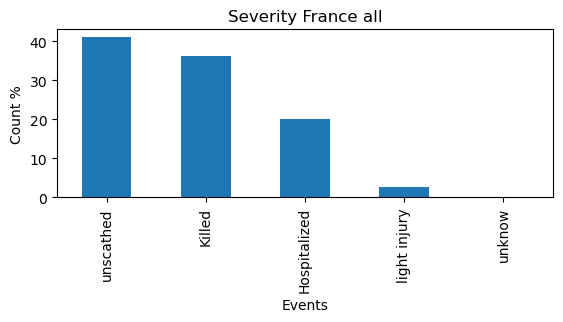

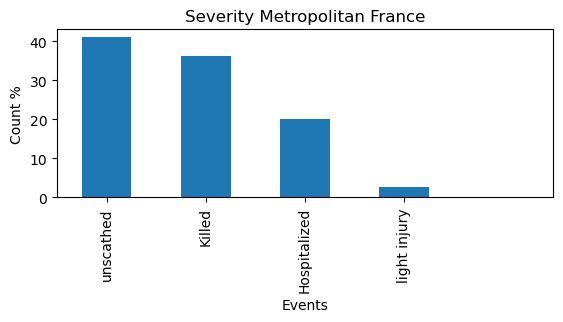

In [5]:
# exploring a possible target variable
#severity
event_counts = df['grav'].value_counts()
event_percentages = (event_counts / event_counts.sum()) * 100
plt.subplot(2,1,1)
event_percentages.plot.bar()
labels = ['unscathed','Killed','Hospitalized','light injury','unknow']
# Add labels and title to the plot
plt.xticks(range(len(event_percentages)), labels)
plt.xlabel('Events')
plt.ylabel('Count %')
plt.title('Severity France all')
# Display the plot
plt.show()



event_counts_M = Metro_df['grav'].value_counts()
event_percentages_M = (event_counts_M / event_counts_M.sum()) * 100
plt.subplot(2,1,2)
event_percentages.plot.bar()
labels = ['unscathed','Killed','Hospitalized','light injury']
# Add labels and title to the plot
plt.xticks(range(len(event_percentages_M)), labels)
plt.xlabel('Events')
plt.ylabel('Count %')
plt.title('Severity Metropolitan France')
# Display the plot
plt.show()


In [33]:
# create a new variable for the severity ['Grav'] of accidents ( fatal, non-fatal) as a possible target variable
# a new binary variable 'fatality' based on 'severity'
Metro_df['fatal'] = np.where(Metro_df['grav'].isin([1, 3, 4]), 0, 1)



C:\Users\tiago\AppData\Local\Temp\ipykernel_7712\3092746832.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Metro_df['fatal'] = np.where(Metro_df['grav'].isin([1, 3, 4]), 0, 1)


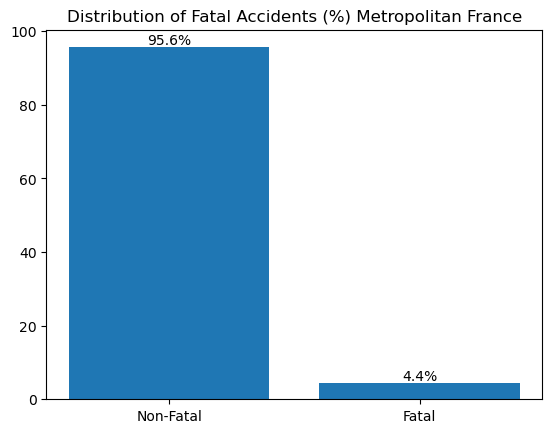

In [34]:
# explorig the new variable 
percentage_distribution = Metro_df['fatal'].value_counts(normalize=True) * 100

# Create a bar plot
plt.bar(percentage_distribution.index, percentage_distribution.values)

# Set the x-axis tick labels
plt.xticks(percentage_distribution.index)
plt.xticks(percentage_distribution.index, ['Non-Fatal', 'Fatal'])
plt.title('Distribution of Fatal Accidents (%) Metropolitan France')
# Show labels on top of bars
for i, v in enumerate(percentage_distribution.values):
    plt.text(i, v, f"{v:.1f}%", ha='center', va='bottom')

plt.show()

In [8]:
# exploting the department of the cities in France Metropolitan area 
Metro_df['dep']

Num_Acc
201000000001    590
201000000002    590
201000000002    590
201000000003    590
201000000003    590
               ... 
201800055764    750
201800055765    750
201800055765    750
201800055766    750
201800055766    750
Name: dep, Length: 1054884, dtype: object

In [9]:
Metro_df['dep'] = Metro_df['dep'].astype(int)

Metro_df['dep'].describe()


C:\Users\tiago\AppData\Local\Temp\ipykernel_7712\959458654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Metro_df['dep'] = Metro_df['dep'].astype(int)


count    1.054884e+06
mean     5.054909e+02
std      2.759793e+02
min      1.000000e+01
25%      2.900000e+02
50%      5.000000e+02
75%      7.500000e+02
max      9.760000e+02
Name: dep, dtype: float64

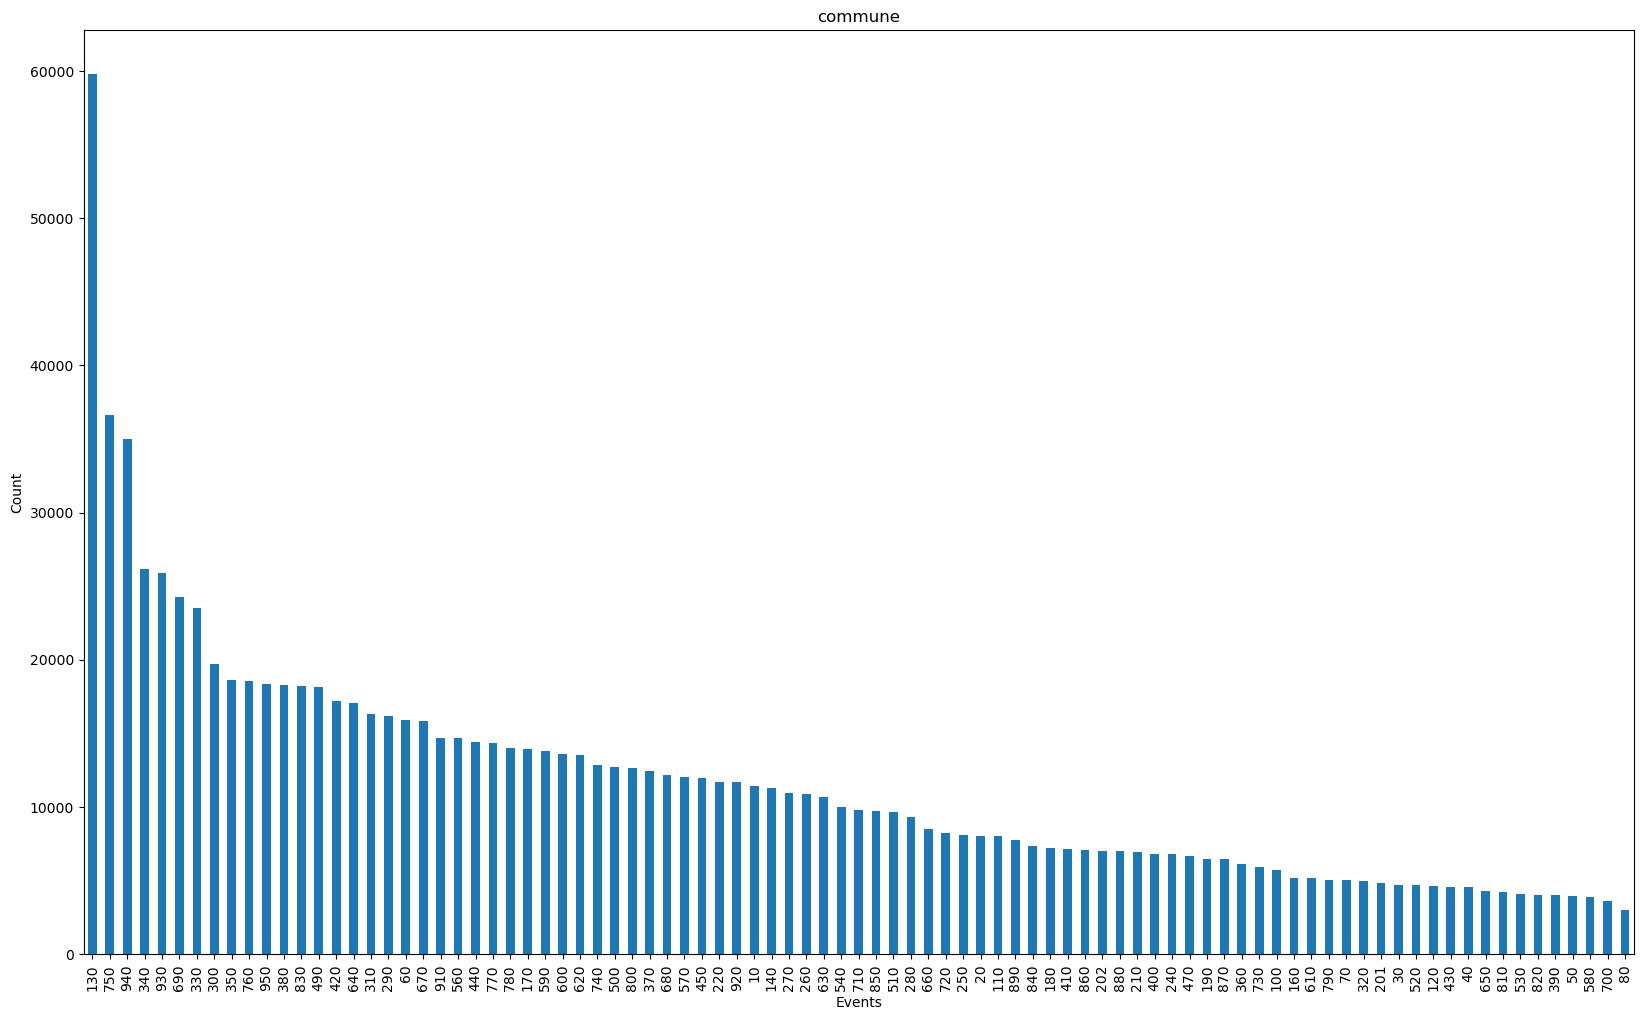

In [10]:
plt.figure(figsize=(20,12))
event_counts = Metro_df['dep'].value_counts()
event_counts_filtered = event_counts[event_counts > 3000]

event_counts_filtered.plot.bar()

plt.xticks(rotation=90)
plt.xlabel('Events')
plt.ylabel('Count')
plt.title('commune')
# Display the plot
plt.show()

In [28]:
Metro_df['jour'].describe()

count    1.054884e+06
mean     1.564186e+01
std      8.764030e+00
min      1.000000e+00
25%      8.000000e+00
50%      1.600000e+01
75%      2.300000e+01
max      3.100000e+01
Name: jour, dtype: float64

In [29]:
Metro_df['datetime'] = pd.to_datetime(
    Metro_df['jour'].astype(str) + '-' +
    Metro_df['mois'].astype(str) + '-' +
    Metro_df['an'].astype(str),
    format='%d-%m-%Y'
)



C:\Users\tiago\AppData\Local\Temp\ipykernel_7712\1175694024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Metro_df['datetime'] = pd.to_datetime(


C:\Users\tiago\AppData\Local\Temp\ipykernel_7712\1166098349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Metro_df['year'] = Metro_df['datetime'].dt.year


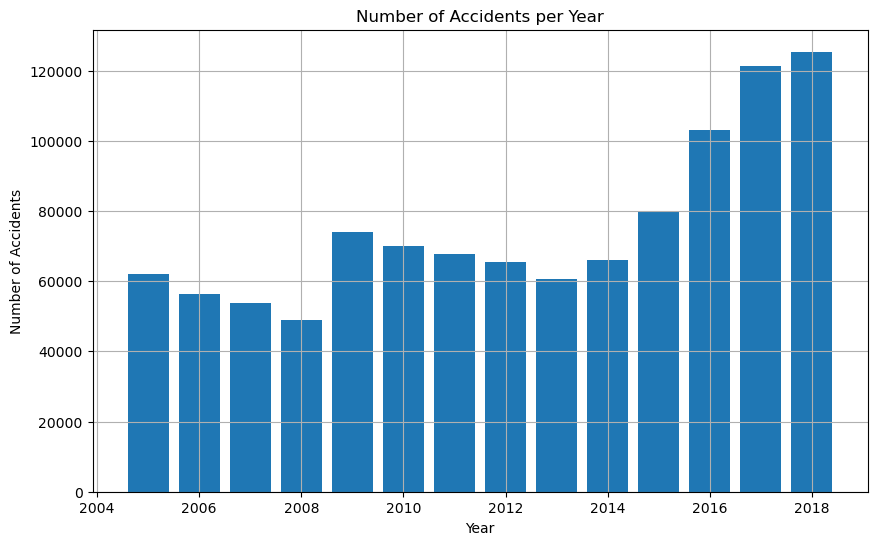

In [30]:
Metro_df['year'] = Metro_df['datetime'].dt.year # new

# Group the data by year and count the occurrences
accidents_per_year = Metro_df['year'].value_counts().sort_index()

# Plot the number of accidents per year
plt.figure(figsize=(10, 6))
plt.bar(accidents_per_year.index, accidents_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents per Year')
plt.grid(True)
plt.show()

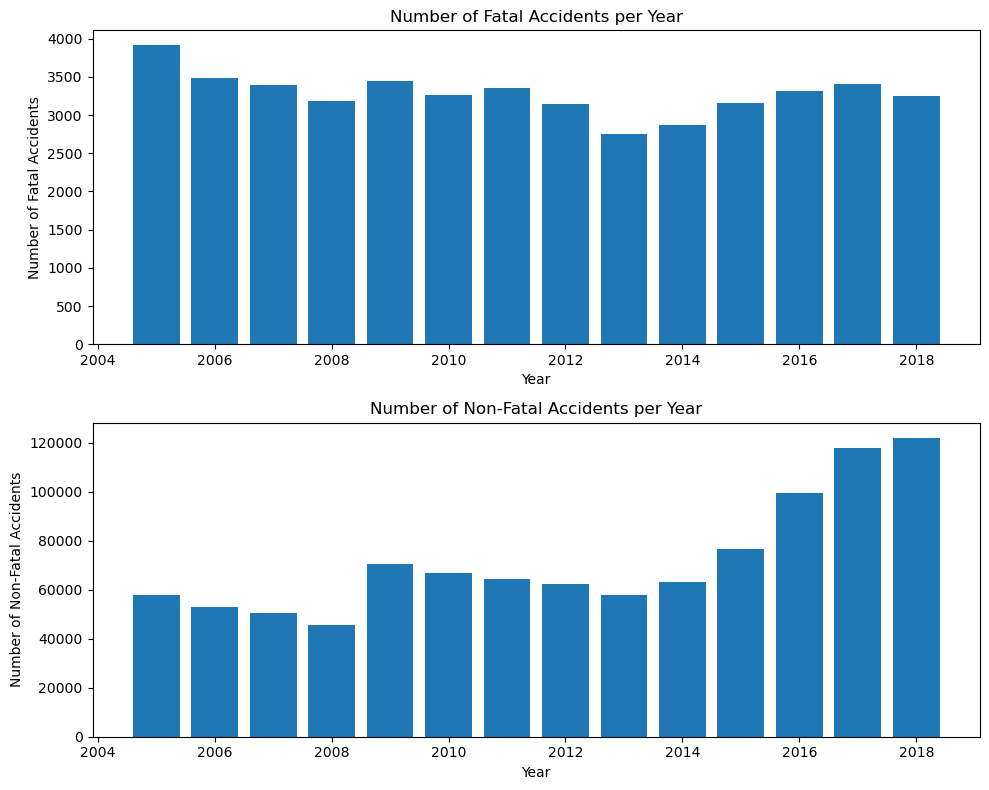

In [36]:
fatal_counts = Metro_df[Metro_df['fatal'] == 1]['year'].value_counts().sort_index()

# Group the data by year and count the occurrences for non-fatal accidents
non_fatal_counts = Metro_df[Metro_df['fatal'] == 0]['year'].value_counts().sort_index()

# Create subplots for fatal and non-fatal accidents
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot the number of fatal accidents per year
ax1.bar(fatal_counts.index, fatal_counts.values)
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Fatal Accidents')
ax1.set_title('Number of Fatal Accidents per Year')

# Plot the number of non-fatal accidents per year
ax2.bar(non_fatal_counts.index, non_fatal_counts.values)
ax2.set_xlabel('Year')
ax2.set_ylabel('Number of Non-Fatal Accidents')
ax2.set_title('Number of Non-Fatal Accidents per Year')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()



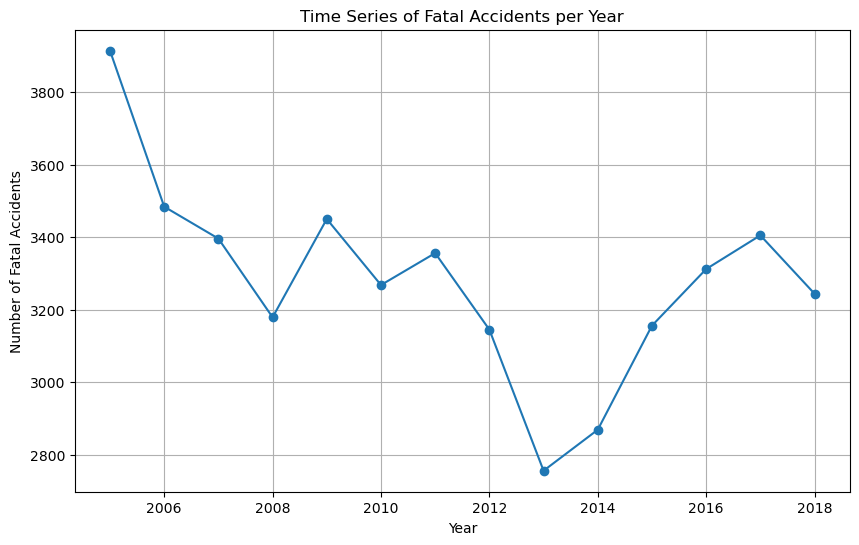

In [38]:
fatal_counts = Metro_df[Metro_df['fatal'] == 1]['year'].value_counts().sort_index()

# Plot the time series of fatal accidents per year
plt.figure(figsize=(10, 6))
plt.plot(fatal_counts.index, fatal_counts.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Fatal Accidents')
plt.title('Time Series of Fatal Accidents per Year')
plt.grid(True)
plt.show()

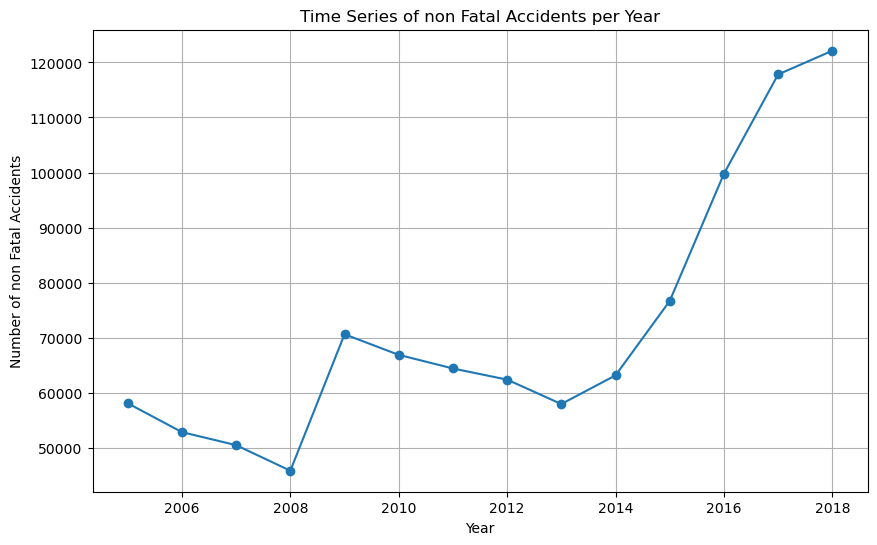

In [41]:
fatal_counts = Metro_df[Metro_df['fatal'] == 0]['year'].value_counts().sort_index()

# Plot the time series of fatal accidents per year
plt.figure(figsize=(10, 6))
plt.plot(fatal_counts.index, fatal_counts.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of non Fatal Accidents')
plt.title('Time Series of non Fatal Accidents per Year')
plt.grid(True)
plt.show()

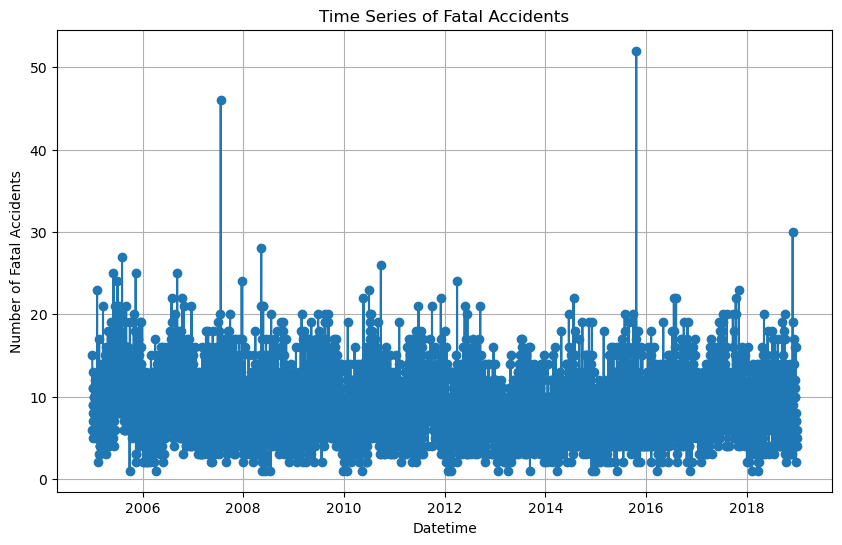

In [37]:
#time series of fatal accidents

fatal_counts = Metro_df[Metro_df['fatal'] == 1]['datetime'].value_counts().sort_index()

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(fatal_counts.index, fatal_counts.values, marker='o')
plt.xlabel('Datetime')
plt.ylabel('Number of Fatal Accidents')
plt.title('Time Series of Fatal Accidents')
plt.grid(True)
plt.show()

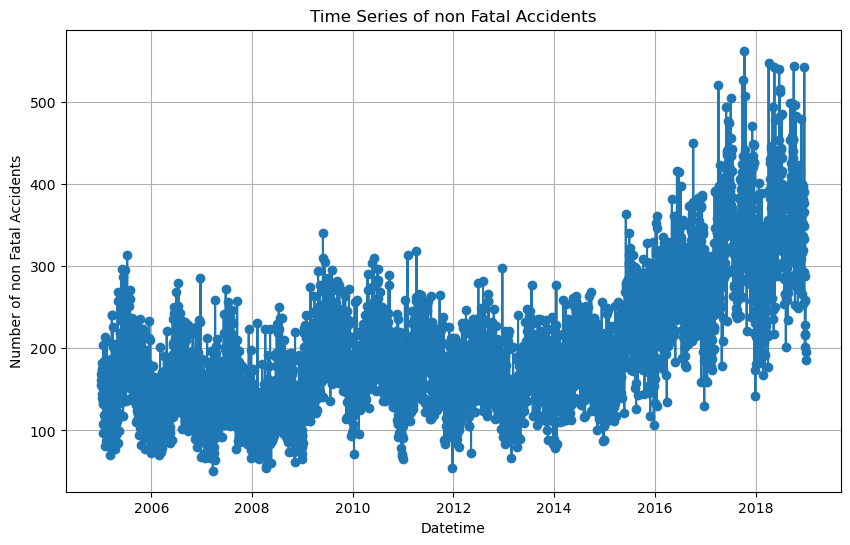

In [14]:
#time series of non fatal accidents
fatal_counts = Metro_df[Metro_df['fatal'] == 0]['datetime'].value_counts().sort_index()

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(fatal_counts.index, fatal_counts.values, marker='o')
plt.xlabel('Datetime')
plt.ylabel('Number of non Fatal Accidents')
plt.title('Time Series of non Fatal Accidents')
plt.grid(True)
plt.show()



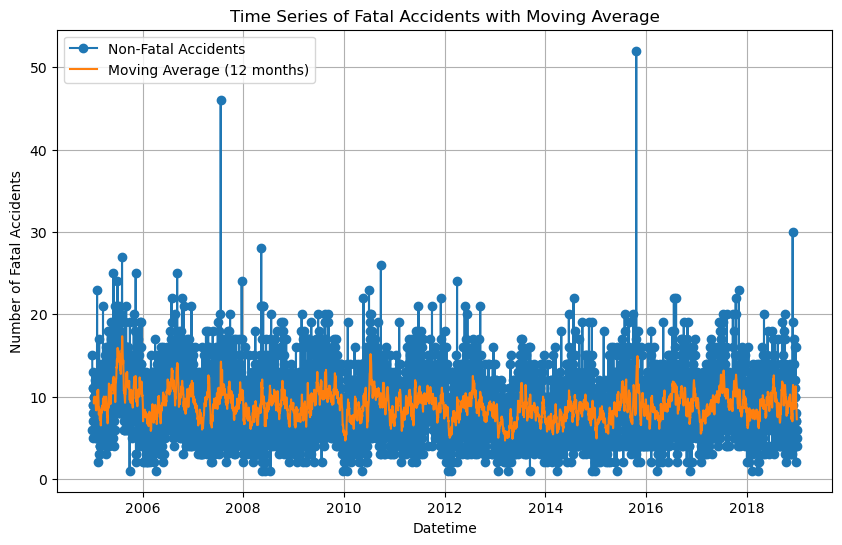

In [42]:
#Filter the DataFrame for fatal accidents
non_fatal_counts = Metro_df[Metro_df['fatal'] == 1]['datetime'].value_counts().sort_index()

# Calculate the moving average with a window size =  12 months
moving_average = non_fatal_counts.rolling(window=12).mean()

# Plot the time series and the moving average
plt.figure(figsize=(10, 6))
plt.plot(non_fatal_counts.index, non_fatal_counts.values, marker='o', label='Non-Fatal Accidents')
plt.plot(moving_average.index, moving_average.values, label='Moving Average (12 months)')
plt.xlabel('Datetime')
plt.ylabel('Number of Fatal Accidents')
plt.title('Time Series of Fatal Accidents with Moving Average')
plt.grid(True)
plt.legend()
plt.show()

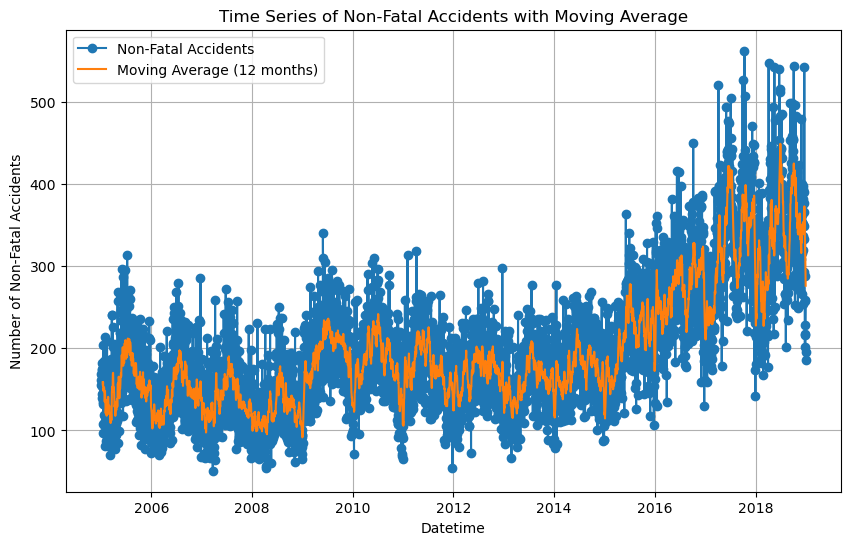

In [16]:
#Filter the DataFrame for non-fatal accidents
non_fatal_counts = Metro_df[Metro_df['fatal'] == 0]['datetime'].value_counts().sort_index()

# Calculate the moving average with a window size of your choice (e.g., 12 months)
moving_average = non_fatal_counts.rolling(window=12).mean()

# Plot the time series and the moving average
plt.figure(figsize=(10, 6))
plt.plot(non_fatal_counts.index, non_fatal_counts.values, marker='o', label='Non-Fatal Accidents')
plt.plot(moving_average.index, moving_average.values, label='Moving Average (12 months)')
plt.xlabel('Datetime')
plt.ylabel('Number of Non-Fatal Accidents')
plt.title('Time Series of Non-Fatal Accidents with Moving Average')
plt.grid(True)
plt.legend()
plt.show()